In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# EDA And Feature Engineering Of Google Play Store Dataset

Problem statement. Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc.
Data Collection.
The data consists of 20 column and 10841 rows.

# Steps We Are Going to Follow
1. Data Clearning
2. Exploratory Data Analysis

# Importing Basic Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# Taking  overview of Dataset

In [3]:
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  int64  
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating,Reviews,Size
count,9367.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.271285
std,0.515735,2.927629e+06,20.881097
min,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.000000
50%,4.300000,2.094000e+03,18.000000
75%,4.500000,5.476800e+04,26.000000
max,5.000000,7.815831e+07,100.000000


In [7]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size                int64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

# Observations
The dataset has missing values

# Cleaning Dataset

In [9]:
df = df.drop_duplicates()

In [10]:
df = df.dropna(how='all')

In [11]:
df.shape

(10358, 13)

In [12]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

<Axes: xlabel='Rating', ylabel='Density'>

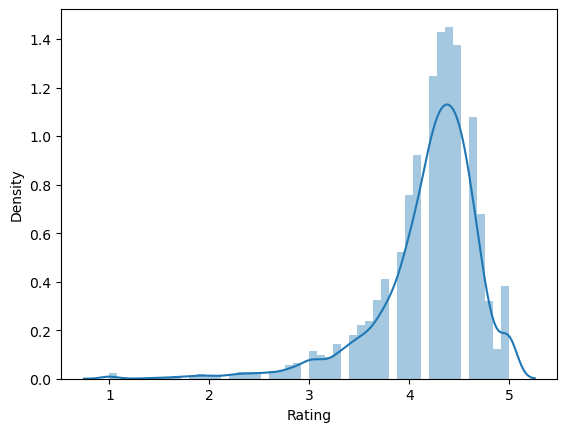

In [13]:
sns.distplot(df['Rating'])

<Axes: >

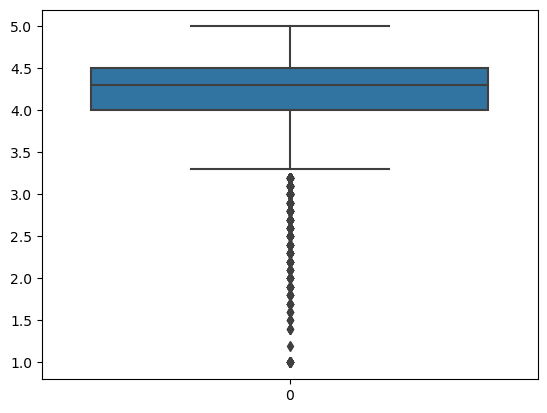

In [14]:
sns.boxplot(df['Rating'])

In [15]:
np.mean(df['Rating'])

4.187619475992354

In [16]:
df['Rating'] = df['Rating'].fillna(np.mean(df['Rating']))

In [17]:
df['Rating'].isnull().sum()

0

In [18]:
df['Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int64)

In [19]:
#df['Reviews'].astype('int')

#it will through a error as one wrong format value is present

In [20]:
# We see that one wrong format value is present

In [21]:
df['Reviews'] = df['Reviews'].astype(str)

In [22]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [23]:
df['Reviews'] = df['Reviews'].replace('3.0M','3000000')

In [24]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
df['Reviews'].astype(int)

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10358, dtype: int32

In [26]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
df['Size'].unique()

array([ 19,  14,   8,  25,   2,   5,  29,  33,   3,  28,  12,  20,  21,
        37,  17,  39,  31,   4,   7,  23,   6,   9,  11,  24,  15,  10,
         1,  26,  56,  57,  35,  54,   0,  27,  16,  38,  32,  18,  52,
        30,  22,  13,  73,  42,  55,  51,  41,  48,  46,  40,  61,  66,
        44,  53,  45,  63,  49,  77,  70,  36,  84,  97,  47,  76,  59,
        78,  72,  43,  34,  93,  65,  79, 100,  58,  50,  68,  64,  67,
        60,  94,  99,  95,  80,  74,  62,  69,  75,  98,  85,  82,  96,
        87,  71,  86,  91,  81,  92,  83,  88,  89,  90], dtype=int64)

In [28]:
# M show mb and k shows kb 
#We convert all the data in kb
# 1 mb is equal 1024 kb

In [29]:
def convert_to_kb(size):
    if isinstance(size, int):
        return size * 1024  # Convert MB to KB for integer values
    elif 'M' in size:
        mb_value = size.split('M')[0]
        kb_value = float(mb_value) * 1024  # Convert MB to KB
        return kb_value
    else:
        return size  # Return unchanged if not in MB format

In [30]:
df['Size'] = df['Size'].apply(convert_to_kb)

In [31]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8192,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2048,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [32]:
df['Size'].unique()

array([ 19456,  14336,   8192,  25600,   2048,   5120,  29696,  33792,
         3072,  28672,  12288,  20480,  21504,  37888,  17408,  39936,
        31744,   4096,   7168,  23552,   6144,   9216,  11264,  24576,
        15360,  10240,   1024,  26624,  57344,  58368,  35840,  55296,
            0,  27648,  16384,  38912,  32768,  18432,  53248,  30720,
        22528,  13312,  74752,  43008,  56320,  52224,  41984,  49152,
        47104,  40960,  62464,  67584,  45056,  54272,  46080,  64512,
        50176,  78848,  71680,  36864,  86016,  99328,  48128,  77824,
        60416,  79872,  73728,  44032,  34816,  95232,  66560,  80896,
       102400,  59392,  51200,  69632,  65536,  68608,  61440,  96256,
       101376,  97280,  81920,  75776,  63488,  70656,  76800, 100352,
        87040,  83968,  98304,  89088,  72704,  88064,  93184,  82944,
        94208,  84992,  90112,  91136,  92160], dtype=int64)

In [33]:
df['Size'] = df['Size'].astype(str)
df['Size'] = df['Size'].str.replace('k', '')

In [34]:
df['Size'].dtypes

dtype('O')

In [35]:
df['Size'].unique()

array(['19456', '14336', '8192', '25600', '2048', '5120', '29696',
       '33792', '3072', '28672', '12288', '20480', '21504', '37888',
       '17408', '39936', '31744', '4096', '7168', '23552', '6144', '9216',
       '11264', '24576', '15360', '10240', '1024', '26624', '57344',
       '58368', '35840', '55296', '0', '27648', '16384', '38912', '32768',
       '18432', '53248', '30720', '22528', '13312', '74752', '43008',
       '56320', '52224', '41984', '49152', '47104', '40960', '62464',
       '67584', '45056', '54272', '46080', '64512', '50176', '78848',
       '71680', '36864', '86016', '99328', '48128', '77824', '60416',
       '79872', '73728', '44032', '34816', '95232', '66560', '80896',
       '102400', '59392', '51200', '69632', '65536', '68608', '61440',
       '96256', '101376', '97280', '81920', '75776', '63488', '70656',
       '76800', '100352', '87040', '83968', '98304', '89088', '72704',
       '88064', '93184', '82944', '94208', '84992', '90112', '91136',
       '9216

In [36]:
df['Size']=df['Size'].replace('Varies with device',np.nan)
df['Size']=df['Size'].replace('1,000+','1000')
df['Size']=df['Size'].astype(float)

In [37]:
df['Size'].isnull().sum()

0

<Axes: xlabel='Size', ylabel='Density'>

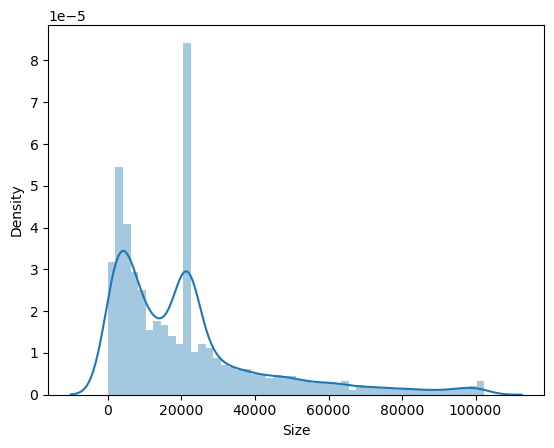

In [38]:
sns.distplot(df['Size'],kde = True)

<Axes: >

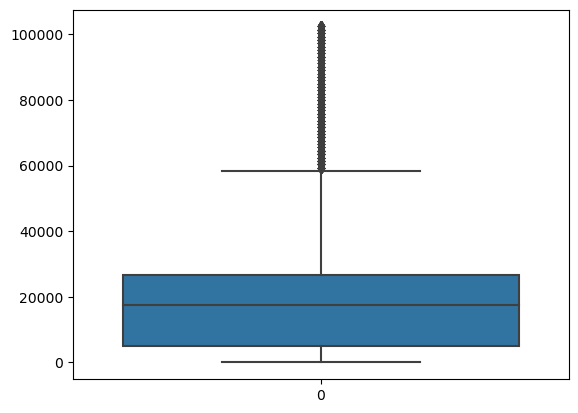

In [39]:
sns.boxplot(df['Size'])

In [40]:
median_size = df['Size'].median()
df['Size'] = df['Size'].fillna(median_size)

In [41]:
df['Size'].isnull().sum()

0

In [42]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8192.0,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2048.0,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
df['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [44]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [45]:
chars_to_remove = ['+',',','$']
coloumns_to_clean = ['Installs','Price']
for item in chars_to_remove:
    for coloumns in coloumns_to_clean:
        df[coloumns] = df[coloumns].str.replace(item,'')

In [46]:
df['Price'] = df['Price'].replace('Everyone',0)

In [47]:
df['Price'] = df['Price'].astype(float)

In [48]:
df['Installs'] = df['Installs'].replace('Free',np.nan)

In [49]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

<Axes: xlabel='Installs', ylabel='Density'>

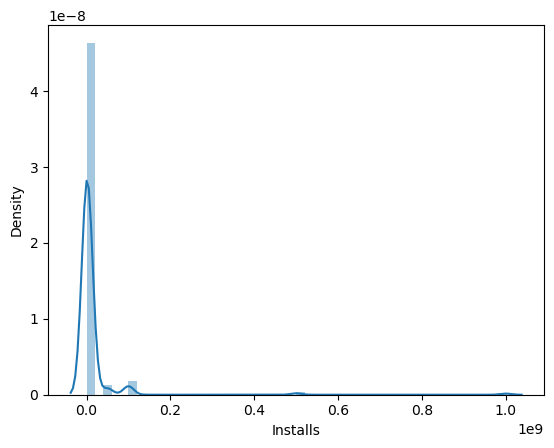

In [50]:
sns.distplot(df['Installs'])

<Axes: >

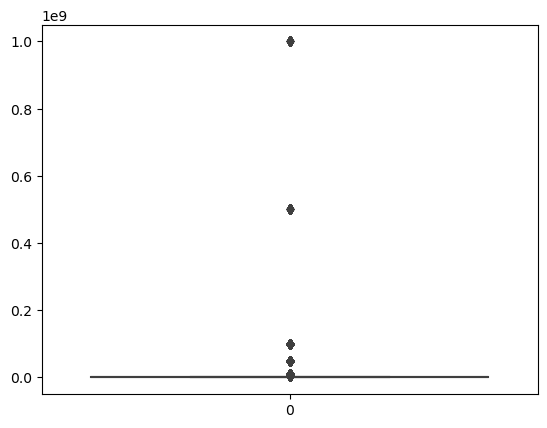

In [51]:
sns.boxplot(df['Installs'])

In [52]:
df['Installs']=df['Installs'].astype(float)

In [53]:
installs_median = df['Installs'].median()

In [54]:
df['Installs'] = df['Installs'].fillna(installs_median)

In [55]:
df['Installs'].isnull().sum()

0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  float64
 5   Installs        10358 non-null  float64
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.4+ MB


In [57]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8192.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2048.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [58]:
df['last_Updated_Month']=df['Last Updated'].str.split(' ').str[0]
df['last_Updated_Day']=df['Last Updated'].str.split(' ').str[1]
df['last_Updated_Day']=df['last_Updated_Day'].str.split(',').str[0]
df['last_Updated_year']=df['Last Updated'].str.split(',').str[1]

In [59]:
df['last_Updated_Month'].unique()

array(['January', 'August', 'June', 'March', 'April', 'September', 'July',
       'October', 'November', 'May', 'December', 'February'], dtype=object)

In [60]:
df['last_Updated_Month'] = df['last_Updated_Month'].replace('1.0.19','October')

In [61]:
df['last_Updated_Day'].unique()

array(['7', '15', '1', '8', '20', '26', '14', '3', '27', '31', '2', '6',
       '30', '12', '25', '11', '21', '22', '19', '29', '17', '28', '10',
       '18', '16', '4', '24', '23', '9', '5', '13'], dtype=object)

In [62]:
df['last_Updated_Day'] = df['last_Updated_Day'].fillna(1)

In [63]:
df['last_Updated_year'].unique()

array([' 2018', ' 2017', ' 2014', ' 2016', ' 2015', ' 2013', ' 2012',
       ' 2011', ' 2010'], dtype=object)

In [64]:
df['last_Updated_year'] = df['last_Updated_year'].fillna(2019)

In [65]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_Updated_Month,last_Updated_Day,last_Updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19456.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,January,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,January,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8192.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,August,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25600.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,June,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2048.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,June,20,2018


In [66]:
df = df.drop('Last Updated',axis = 1)

In [67]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,last_Updated_Month,last_Updated_Day,last_Updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19456.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8192.0,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25600.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2048.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June,20,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38,54272.0,5000.0,Free,0.0,Everyone,Education,1.48,4.1 and up,July,25,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3072.0,100.0,Free,0.0,Everyone,Education,1.0,4.1 and up,July,6,2018
10838,Parkinson Exercices FR,MEDICAL,4.187619,3,9216.0,1000.0,Free,0.0,Everyone,Medical,1.0,2.2 and up,January,20,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,21504.0,1000.0,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,January,19,2015


In [68]:
df.dtypes

App                    object
Category               object
Rating                float64
Reviews                object
Size                  float64
Installs              float64
Type                   object
Price                 float64
Content Rating         object
Genres                 object
Current Ver            object
Android Ver            object
last_Updated_Month     object
last_Updated_Day       object
last_Updated_year      object
dtype: object

In [69]:
df['Reviews'] = df['Reviews'].astype(float)
df['last_Updated_Day'] = df['last_Updated_Day'].astype(float)
df['last_Updated_year'] = df['last_Updated_year'].astype(float)

In [70]:
df.dtypes

App                    object
Category               object
Rating                float64
Reviews               float64
Size                  float64
Installs              float64
Type                   object
Price                 float64
Content Rating         object
Genres                 object
Current Ver            object
Android Ver            object
last_Updated_Month     object
last_Updated_Day      float64
last_Updated_year     float64
dtype: object

In [71]:
[columns for columns in df.columns if df[columns].dtypes=='O']

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver',
 'last_Updated_Month']

In [72]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,last_Updated_Month,last_Updated_Day,last_Updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19456.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January,7.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January,15.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8192.0,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August,1.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25600.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June,8.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2048.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June,20.0,2018.0


In [73]:
df.isnull().sum()

App                   0
Category              1
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  1
Price                 0
Content Rating        0
Genres                1
Current Ver           8
Android Ver           2
last_Updated_Month    0
last_Updated_Day      0
last_Updated_year     0
dtype: int64

In [74]:
df['Type'] = df['Type'].fillna(df['Type'].mode().iloc[0])

In [75]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,last_Updated_Month,last_Updated_Day,last_Updated_year


In [76]:
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode().iloc[0])

In [77]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,last_Updated_Month,last_Updated_Day,last_Updated_year
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55.0,2048.0,5000.0,Free,0.00,Everyone,Art & Design,NaN,4.2 and up,June,6.0,2018.0
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145.0,0.0,1000000.0,Free,0.00,Everyone,Libraries & Demo,NaN,1.5 and up,February,12.0,2013.0
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010.0,8192.0,500000.0,Free,0.00,Everyone,Tools,NaN,4.0 and up,May,10.0,2017.0
6803,BT Master,FAMILY,4.187619,0.0,0.0,100.0,Free,0.00,Everyone,Education,NaN,1.6 and up,November,6.0,2016.0
7333,Dots puzzle,FAMILY,4.000000,179.0,14336.0,50000.0,Paid,0.99,Everyone,Puzzle,NaN,4.0 and up,April,18.0,2018.0
7407,Calculate My IQ,FAMILY,4.187619,44.0,7168.0,10000.0,Free,0.00,Everyone,Entertainment,NaN,2.3 and up,April,3.0,2017.0
7730,UFO-CQ,TOOLS,4.187619,1.0,0.0,10.0,Paid,0.99,Everyone,Tools,NaN,2.0 and up,July,4.0,2016.0
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.187619,8.0,0.0,1000.0,Free,0.00,Everyone,Books & Reference,NaN,3.0 and up,January,31.0,2017.0


In [78]:
df['Current Ver'] = df['Current Ver'].fillna(1)

In [79]:
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode().iloc[0])

In [80]:
df.isnull().sum()

App                   0
Category              1
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                1
Current Ver           0
Android Ver           0
last_Updated_Month    0
last_Updated_Day      0
last_Updated_year     0
dtype: int64

In [81]:
df.dtypes

App                    object
Category               object
Rating                float64
Reviews               float64
Size                  float64
Installs              float64
Type                   object
Price                 float64
Content Rating         object
Genres                 object
Current Ver            object
Android Ver            object
last_Updated_Month     object
last_Updated_Day      float64
last_Updated_year     float64
dtype: object

In [82]:
# mapping the last_Updated_Month 
df['last_Updated_Month']=df['last_Updated_Month'].map({'January':1,'February':2,'March': 3,'April': 4,'May': 5,'June': 6,'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12})

In [83]:
df['last_Updated_Month'].unique()

array([ 1,  8,  6,  3,  4,  9,  7, 10, 11,  5, 12,  2], dtype=int64)

In [84]:
df.dtypes

App                    object
Category               object
Rating                float64
Reviews               float64
Size                  float64
Installs              float64
Type                   object
Price                 float64
Content Rating         object
Genres                 object
Current Ver            object
Android Ver            object
last_Updated_Month      int64
last_Updated_Day      float64
last_Updated_year     float64
dtype: object

In [85]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,last_Updated_Month,last_Updated_Day,last_Updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19456.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1,7.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14336.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1,15.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8192.0,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8,1.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25600.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6,8.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2048.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6,20.0,2018.0


In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
encoder = LabelEncoder()

In [88]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [89]:
df['Type'] = df['Type'].replace('0','Free')

In [90]:
df['Type'] = encoder.fit_transform(df['Type'])

In [91]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [92]:
#df['Content Rating'] = encoder.fit_transform(df['Content Rating'])

In [93]:
#df['Content Rating'].unique()

In [94]:
## Lets go ahead and explore more data
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'last_Updated_Month', 'last_Updated_Day', 'last_Updated_year']

We have 6 categorical features : ['App', 'Category', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [95]:
df[numeric_features].corr()

,Rating,Reviews,Size,Installs,Type,Price,last_Updated_Month,last_Updated_Day,last_Updated_year
Rating,1.000000,0.068610,0.073658,0.050794,0.034506,-0.020550,0.016098,-0.009240,0.126581
Reviews,0.068610,1.000000,0.130027,0.634998,-0.041258,-0.009416,0.044699,-0.024669,0.075734
Size,0.073658,0.130027,1.000000,0.082355,-0.026601,-0.024205,0.035669,-0.003970,0.209217
Installs,0.050794,0.634998,0.082355,1.000000,-0.049508,-0.011146,0.053868,-0.043538,0.087369
Type,0.034506,-0.041258,-0.026601,-0.049508,1.000000,0.224235,-0.005580,-0.001715,-0.177155
Price,-0.020550,-0.009416,-0.024205,-0.011146,0.224235,1.000000,0.006500,-0.008477,-0.005630
last_Updated_Month,0.016098,0.044699,0.035669,0.053868,-0.005580,0.006500,1.000000,-0.074277,-0.190558
last_Updated_Day,-0.009240,-0.024669,-0.003970,-0.043538,-0.001715,-0.008477,-0.074277,1.000000,-0.015265
last_Updated_year,0.126581,0.075734,0.209217,0.087369,-0.177155,-0.005630,-0.190558,-0.015265,1.000000


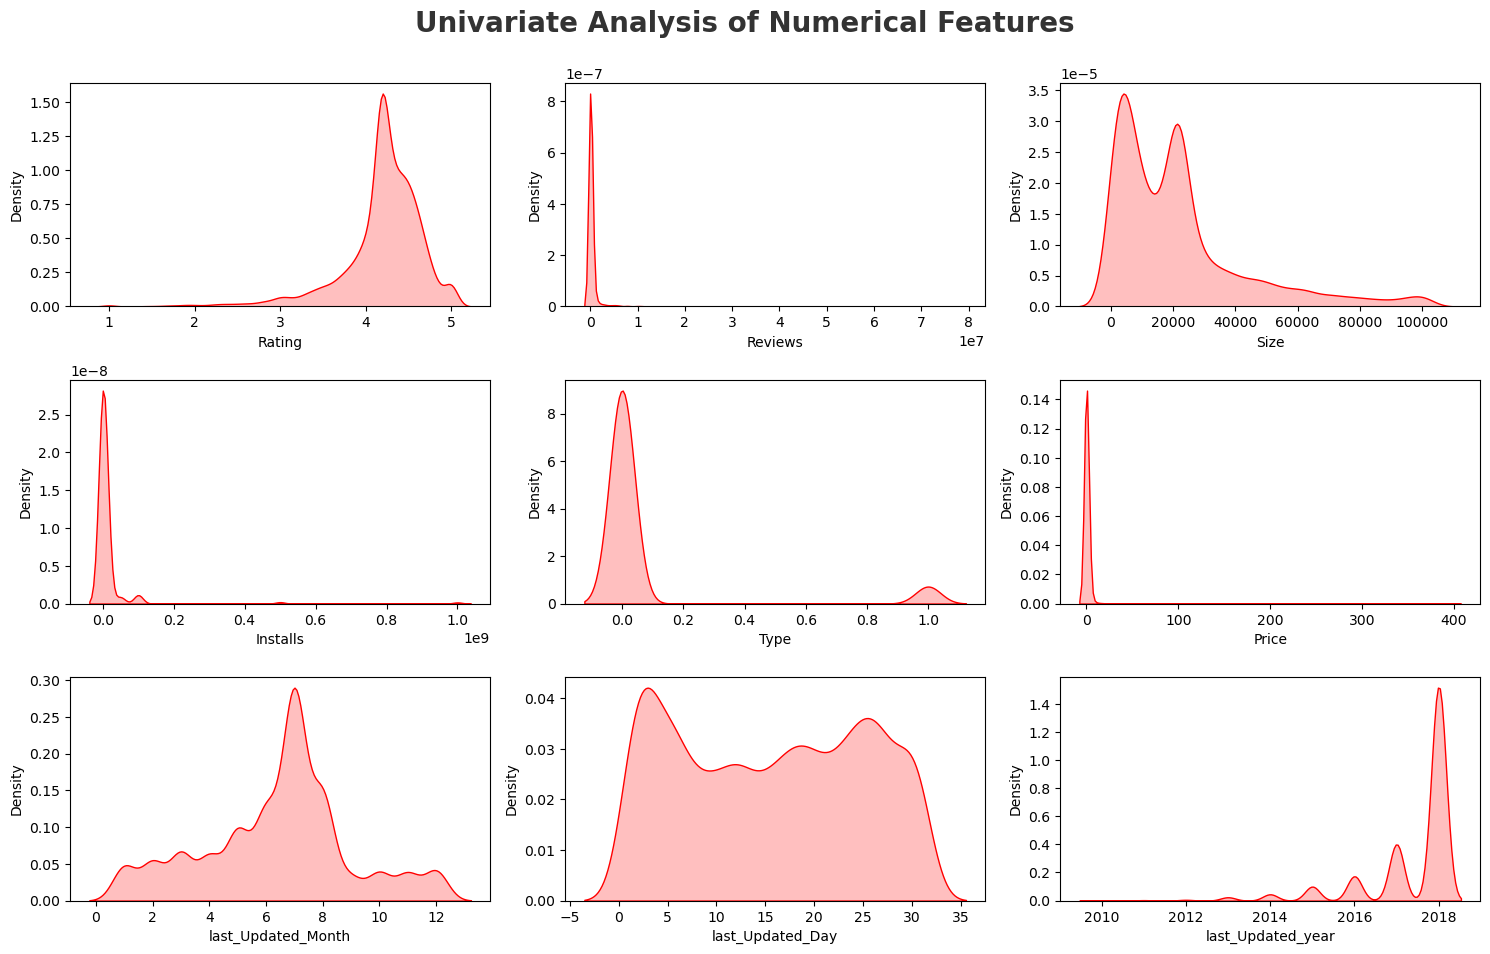

In [96]:
## Visualization Diagrams

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


# Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed


# Create a boxplot to compare rating by Categories

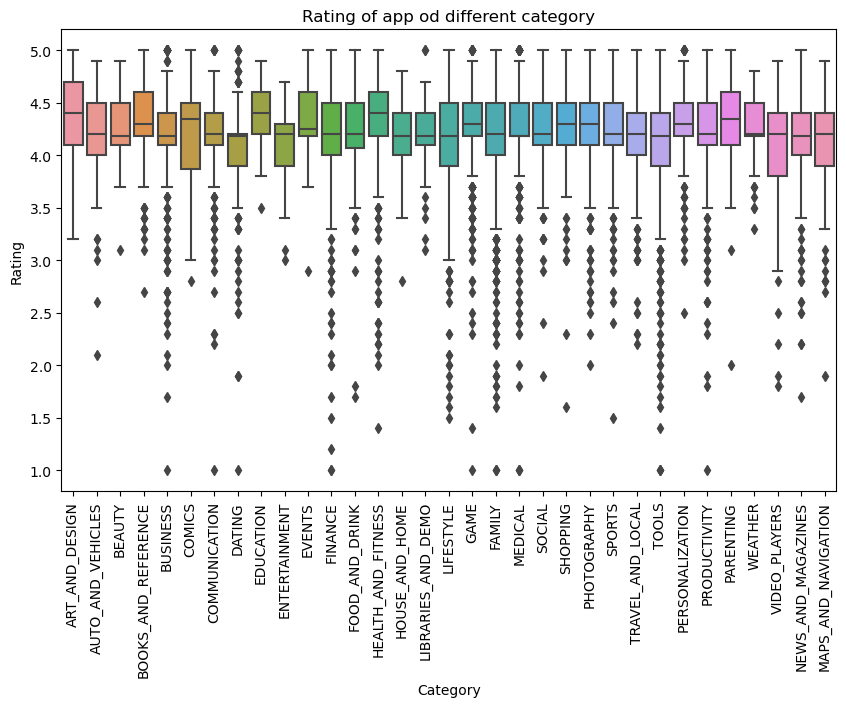

In [97]:

plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='Category', y='Rating', data=df)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels by 45 degrees
plt.title('Rating of app od different category')
plt.show()

# The relationship between the size of an app and its rating

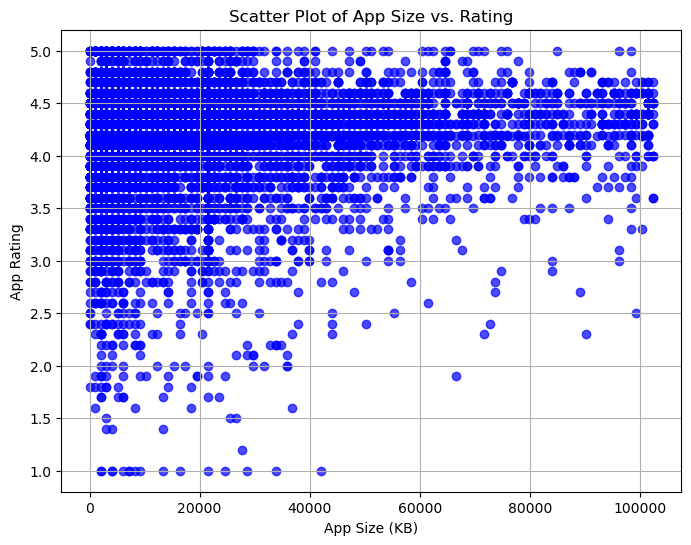

In [98]:
# Create the scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size
plt.scatter(df['Size'], df['Rating'], color='blue', alpha=0.7)  # 'alpha' controls point transparency
plt.title('Scatter Plot of App Size vs. Rating')
plt.xlabel('App Size (KB)')
plt.ylabel('App Rating')
plt.grid(True)
plt.show()

# Observation
We clearly see that as the size increases the rating of app is also ikncreasing

#  How does the type of app affect its price

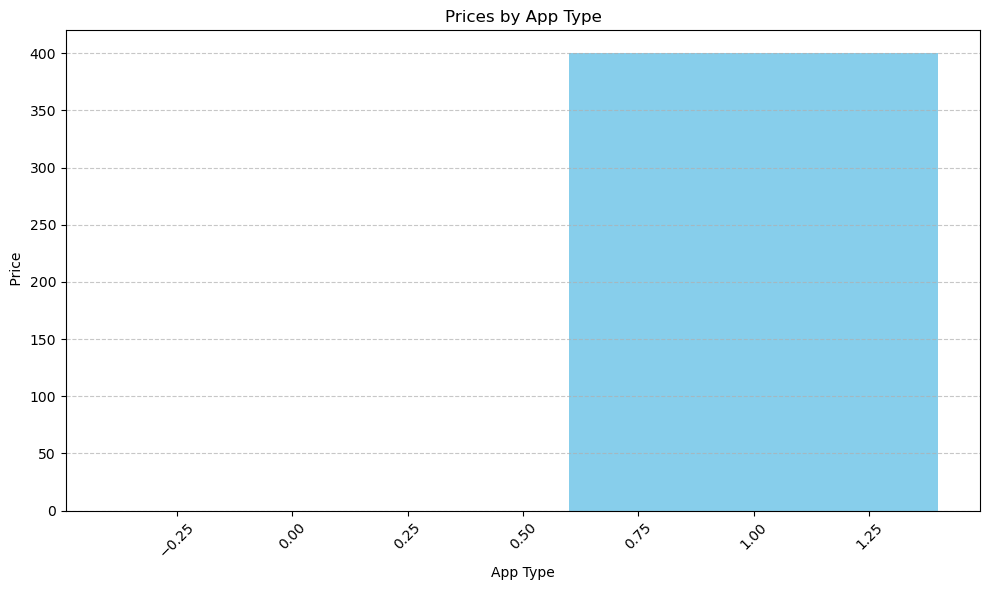

In [99]:
# Create the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size (adjust as needed)
plt.bar(df['Type'], df['Price'], color='skyblue')
plt.title('Prices by App Type')
plt.xlabel('App Type')
plt.ylabel(' Price') 
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for reference
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Ensure the labels fit within the plot area
plt.show()

# Observation
Free apps have No price

# The top 10 most popular apps in the dataset

In [100]:
# Sort the DataFrame by the 'Installs' column in descending order
df_sorted = df.sort_values(by='Installs', ascending=False)

# Display the top 10 apps with the highest number of installs
top_10_apps = df_sorted[['App','Installs']].head(10) # Display the top 10 apps

# Reset the index to default values and drop the current index
top_10_apps = top_10_apps.reset_index(drop=True)

print(top_10_apps)

                                        App      Installs
0                         Google Play Games  1.000000e+09
1                 Maps - Navigate & Explore  1.000000e+09
2                                    Google  1.000000e+09
3                                  Facebook  1.000000e+09
4                                   Google+  1.000000e+09
5                               Google News  1.000000e+09
6  Messenger – Text and Video Chat for Free  1.000000e+09
7                             Google Photos  1.000000e+09
8              Google Chrome: Fast & Secure  1.000000e+09
9                            Subway Surfers  1.000000e+09


# Observation
Above are the Top 10 most installs app

# Identify the most popular app categories

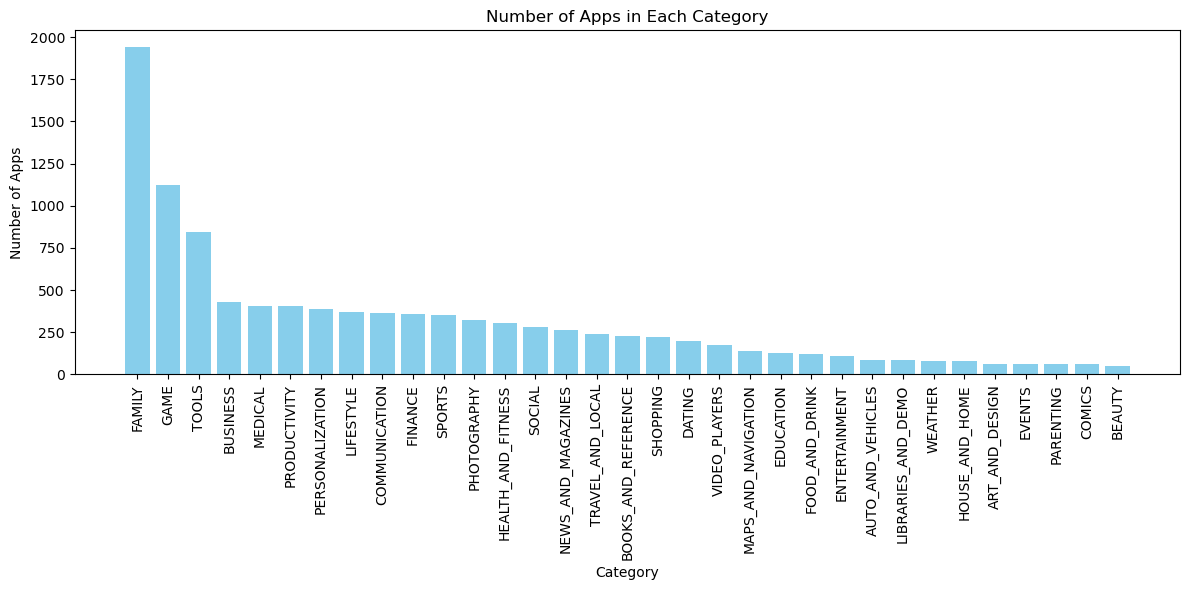

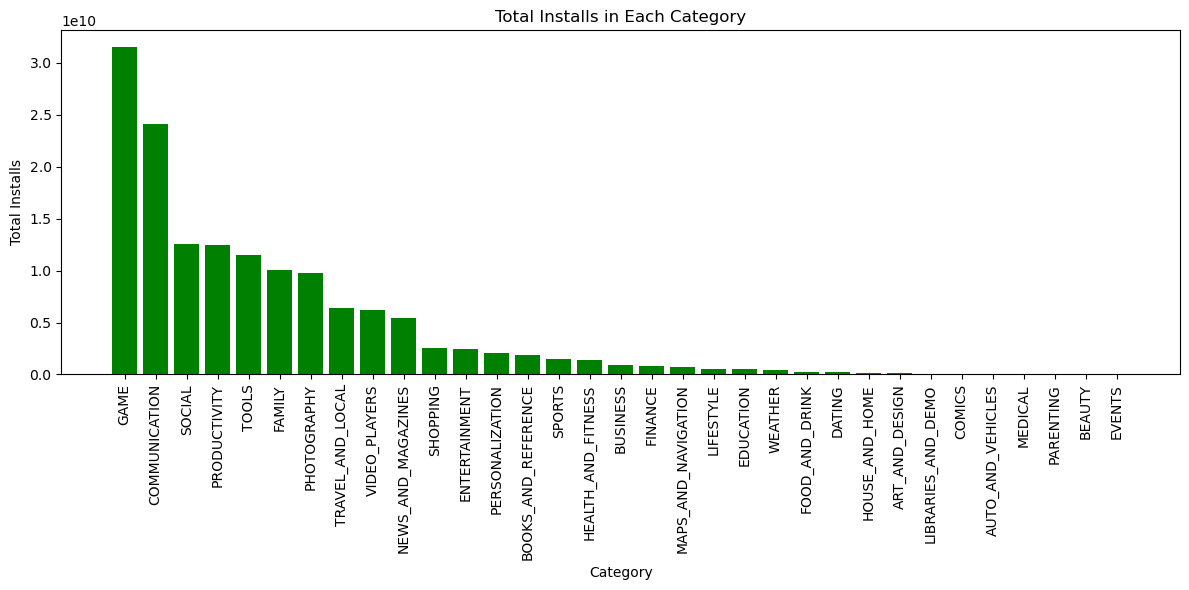

The most popular app category is 'GAME'


In [101]:
# Category Analysis
category_counts = df['Category'].value_counts()
# Create a bar chart to visualize the distribution of apps across categories
plt.figure(figsize=(12, 6))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps in Each Category')
plt.tight_layout()
plt.show()

# Install Analysis
install_counts = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
# Create a bar chart to visualize the total installs in each category
plt.figure(figsize=(12, 6))
plt.bar(install_counts.index, install_counts.values, color='green')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.title('Total Installs in Each Category')
plt.tight_layout()
plt.show()

# Identify the most popular category based on total installs
most_popular_category = install_counts.idxmax()
print(f"The most popular app category is '{most_popular_category}'")


# The most popular app category is 'GAME'

# identify the best time to launch a new app

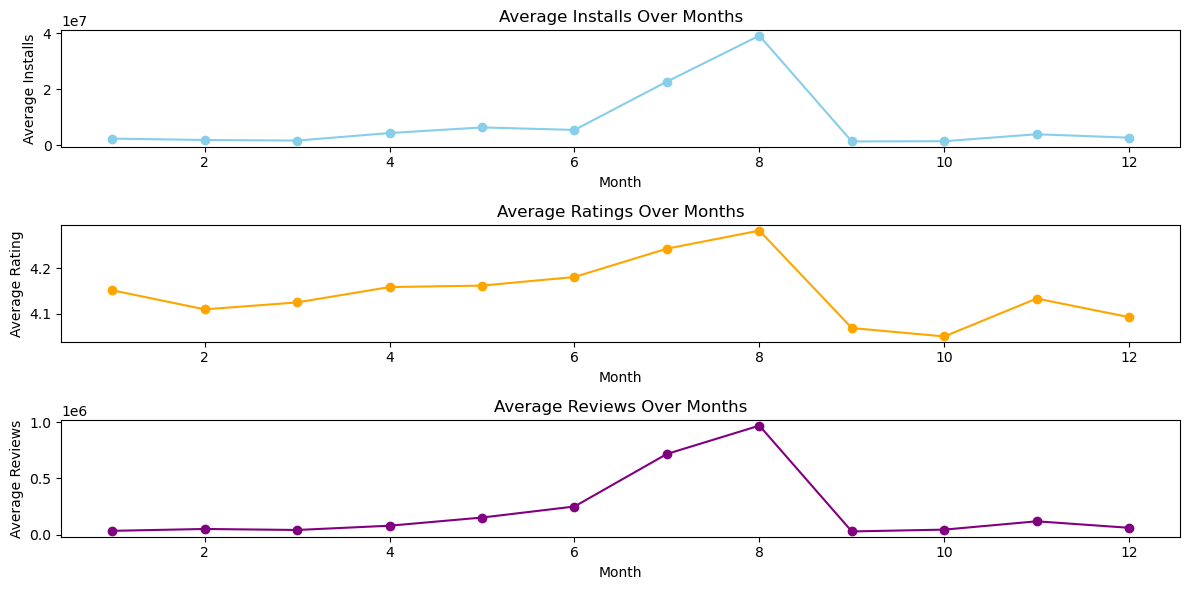

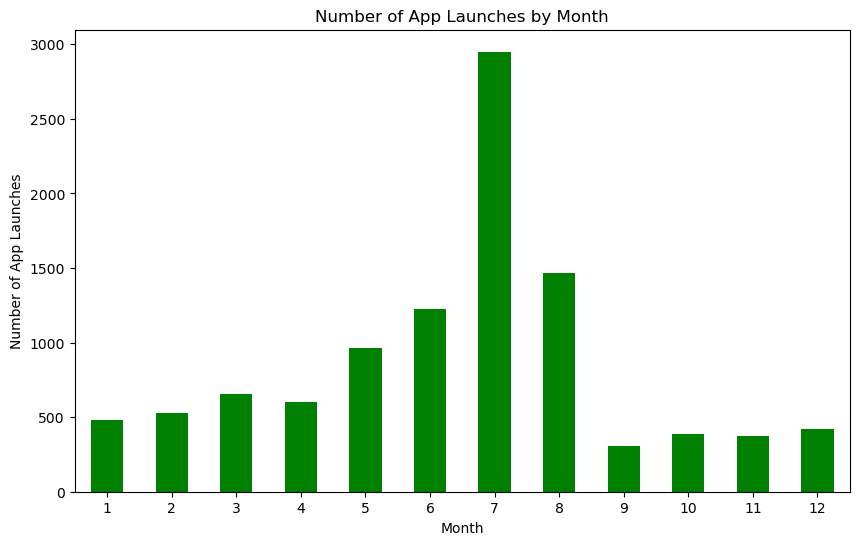

In [102]:
# Extract relevant columns for analysis
launch_data = df[['last_Updated_Month', 'last_Updated_Day', 'last_Updated_year', 'Installs', 'Rating', 'Reviews']]

# Time Series Analysis: Average Installs, Ratings, and Reviews over Time
monthly_avg_installs = launch_data.groupby('last_Updated_Month')['Installs'].mean()
monthly_avg_ratings = launch_data.groupby('last_Updated_Month')['Rating'].mean()
monthly_avg_reviews = launch_data.groupby('last_Updated_Month')['Reviews'].mean()

# Time Series Plots
plt.figure(figsize=(12, 6))
plt.subplot(311)
monthly_avg_installs.plot(kind='line', marker='o', color='skyblue')
plt.title('Average Installs Over Months')
plt.xlabel('Month')
plt.ylabel('Average Installs')

plt.subplot(312)
monthly_avg_ratings.plot(kind='line', marker='o', color='orange')
plt.title('Average Ratings Over Months')
plt.xlabel('Month')
plt.ylabel('Average Rating')

plt.subplot(313)
monthly_avg_reviews.plot(kind='line', marker='o', color='purple')
plt.title('Average Reviews Over Months')
plt.xlabel('Month')
plt.ylabel('Average Reviews')

plt.tight_layout()
plt.show()

# Bar Chart: Number of App Launches by Month
launches_by_month = launch_data['last_Updated_Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
launches_by_month.plot(kind='bar', color='green')
plt.title('Number of App Launches by Month')
plt.xlabel('Month')
plt.ylabel('Number of App Launches')
plt.xticks(rotation=0)
plt.show()

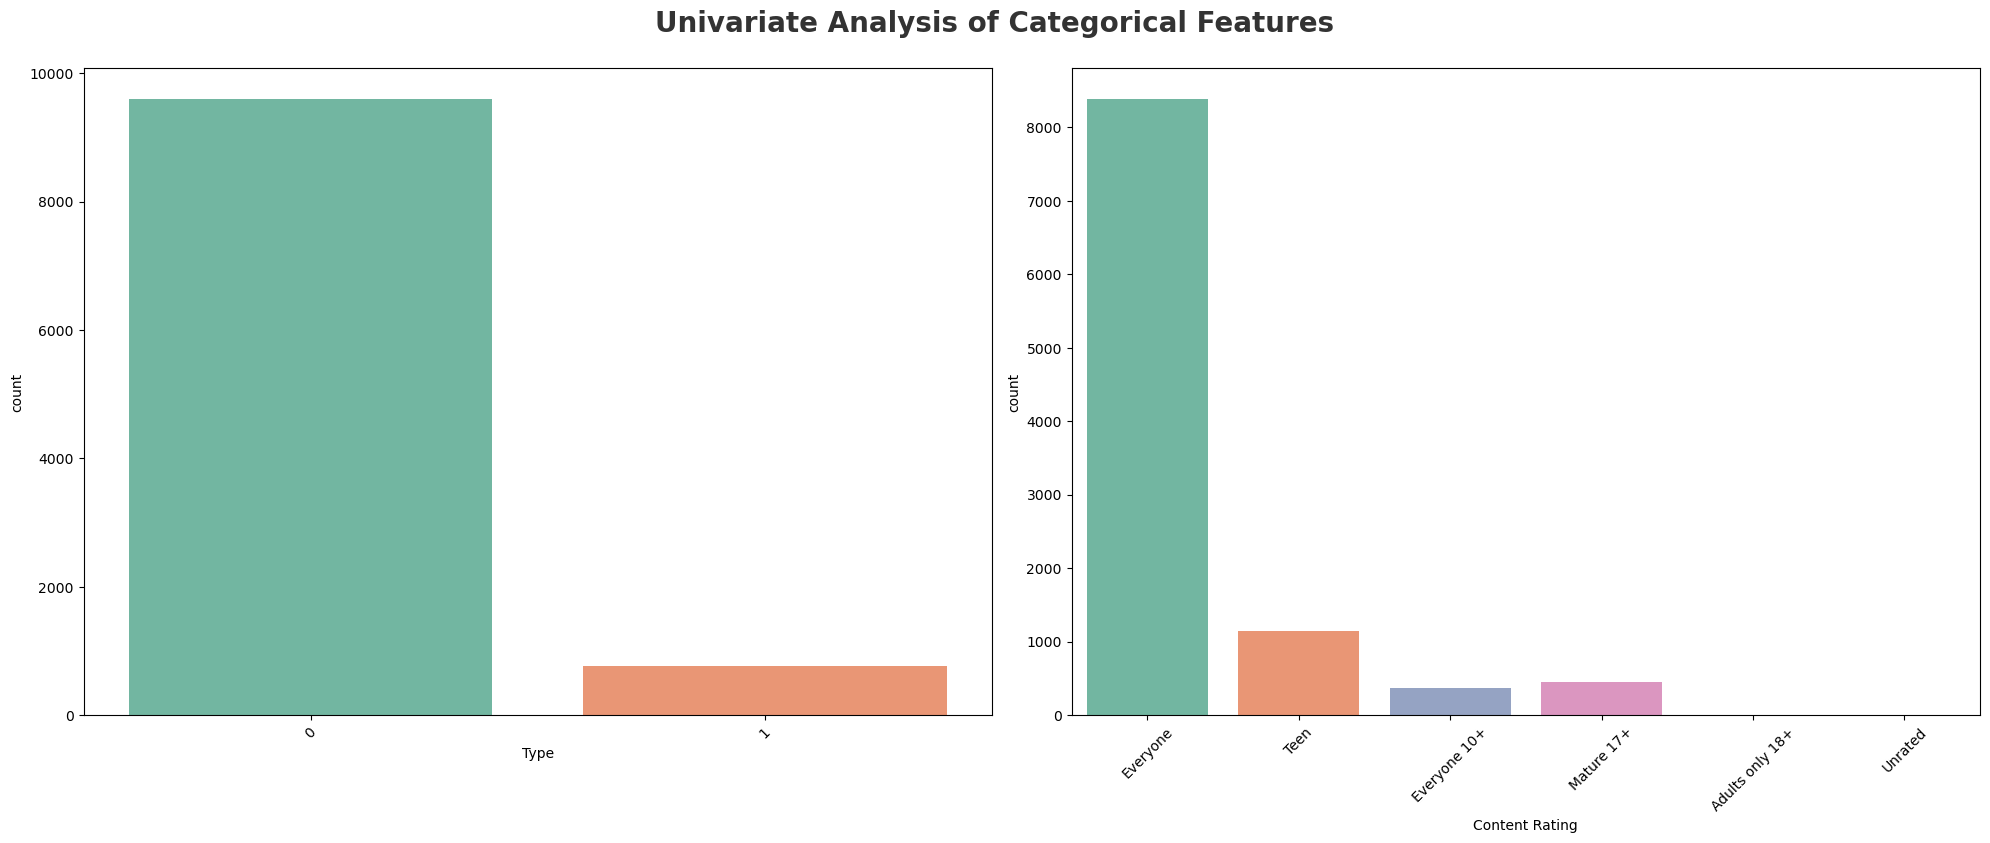

In [103]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<Axes: ylabel='Category'>

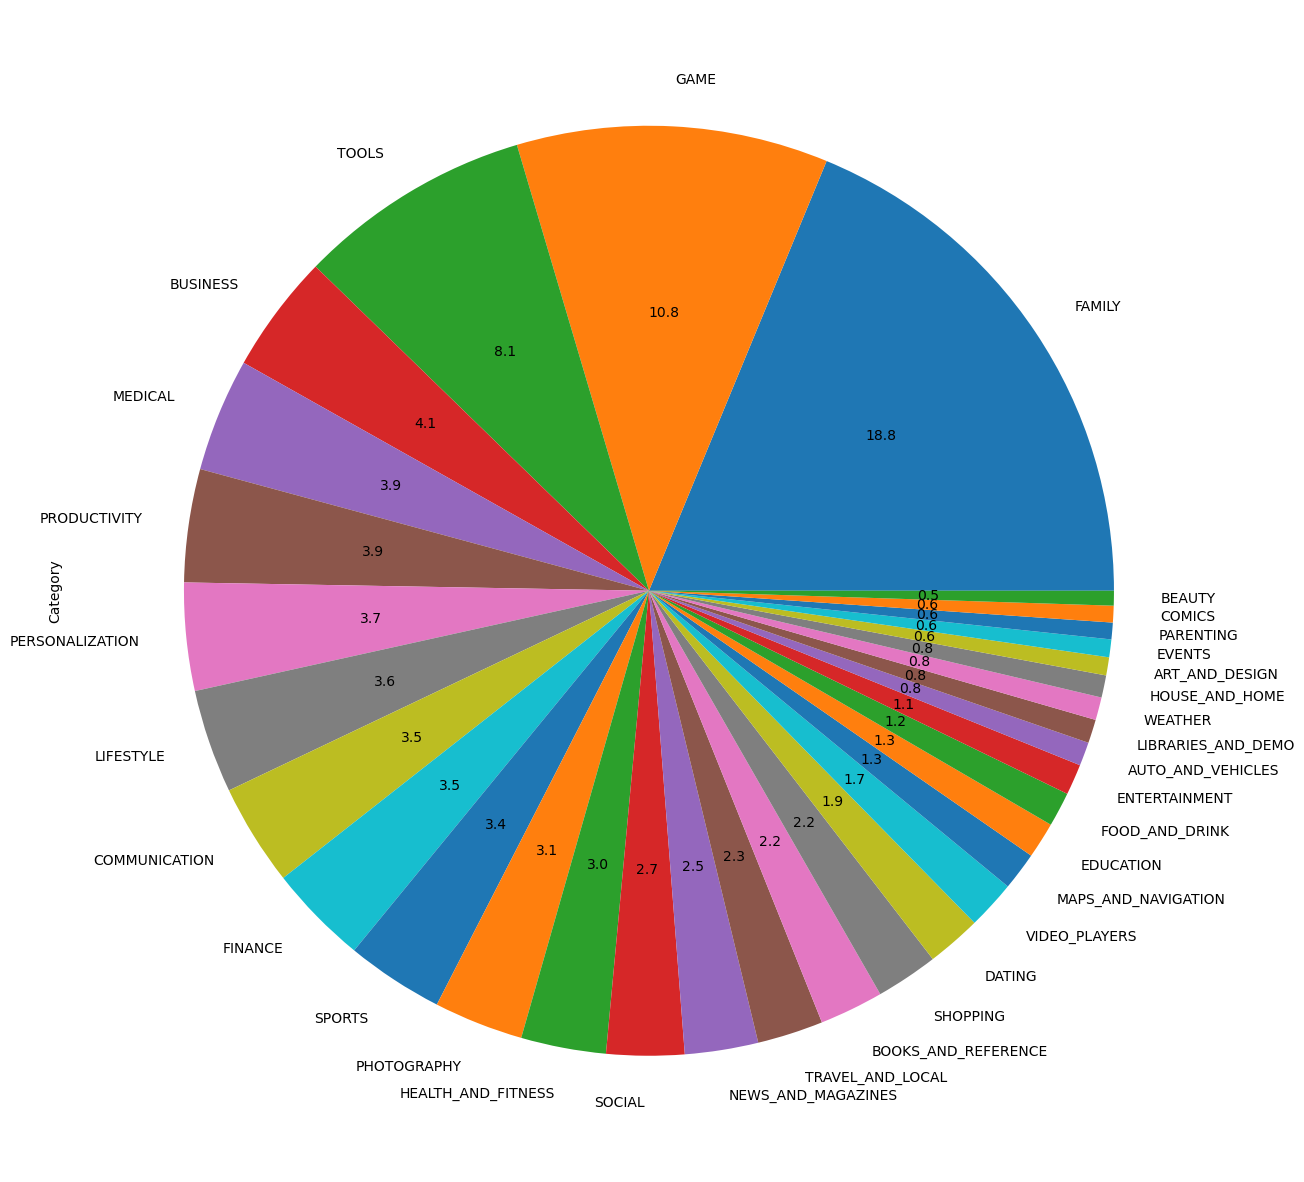

In [104]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')


# Observations
1. There are more kinds of apps in playstore which are under category of family, games & tools
2. Beatuty,comics,arts and weather kinds of apps are very less in playstore

In [105]:
## Top 10 App Categories
category = pd.DataFrame(df['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [106]:
category

,Count
FAMILY,1943
GAME,1121
TOOLS,843
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,388
LIFESTYLE,373
COMMUNICATION,366
FINANCE,360


# Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

# Which Category has largest number of installations??

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

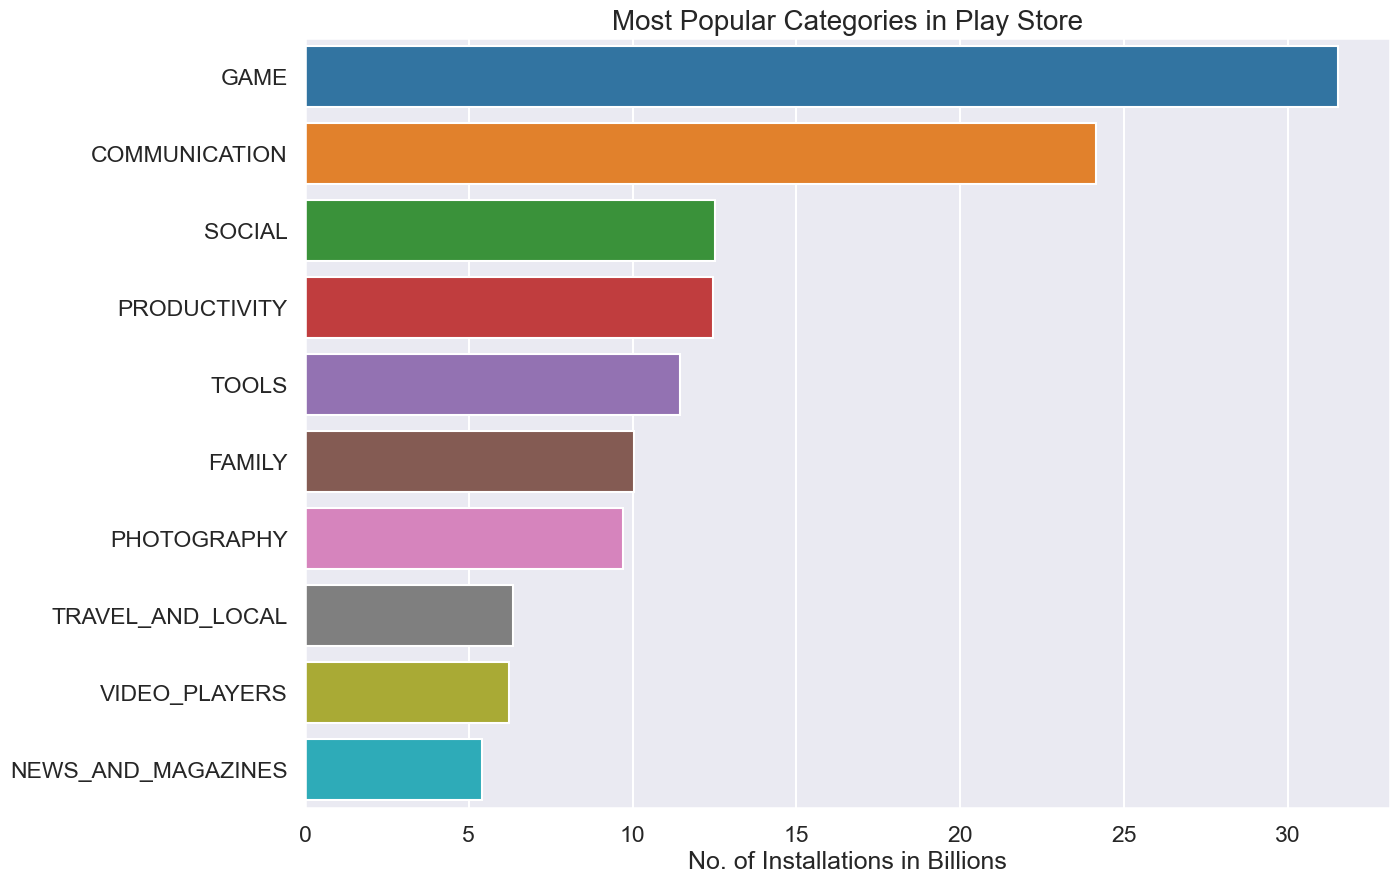

In [107]:
df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

# Insights
Game is the most Popoluar category